In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import random
import json
# from ..processing_func import apply_clahe_color
from func.visualize_func import visualize_keypoints

ModuleNotFoundError: No module named 'func'

In [7]:
bbox_df = pd.read_csv("../dataset/df_0129_added_bbox.csv")
bbox_df.columns

Index(['image_file', 'score', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox'],
      dtype='object')

In [8]:
# bbox_df[bbox_df['score']!=0]

149523


<Axes: >

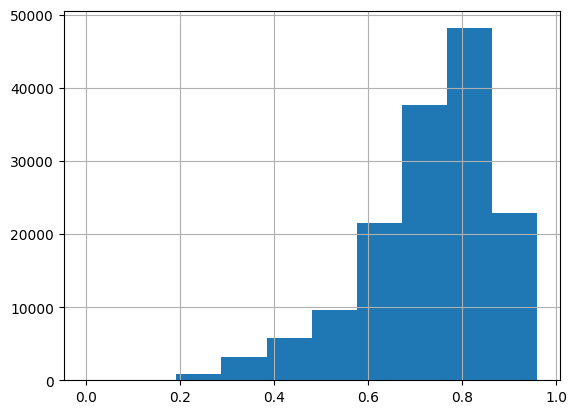

In [9]:
print(len(bbox_df))
bbox_df['score'].hist()

In [10]:
# 하위 10%의 threshold
low_threshold = np.percentile(bbox_df['score'], 10)

In [11]:
# 상위 10%의 threshold
high_threshold = np.percentile(bbox_df['score'], 90)

In [12]:
low_score = bbox_df[bbox_df['score']<low_threshold]
high_score = bbox_df[bbox_df['score']>high_threshold]

In [13]:
low_score.columns

Index(['image_file', 'score', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox'],
      dtype='object')

c:\Users\qtly_u\.conda\envs\tf39\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\qtly_u\.conda\envs\tf39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


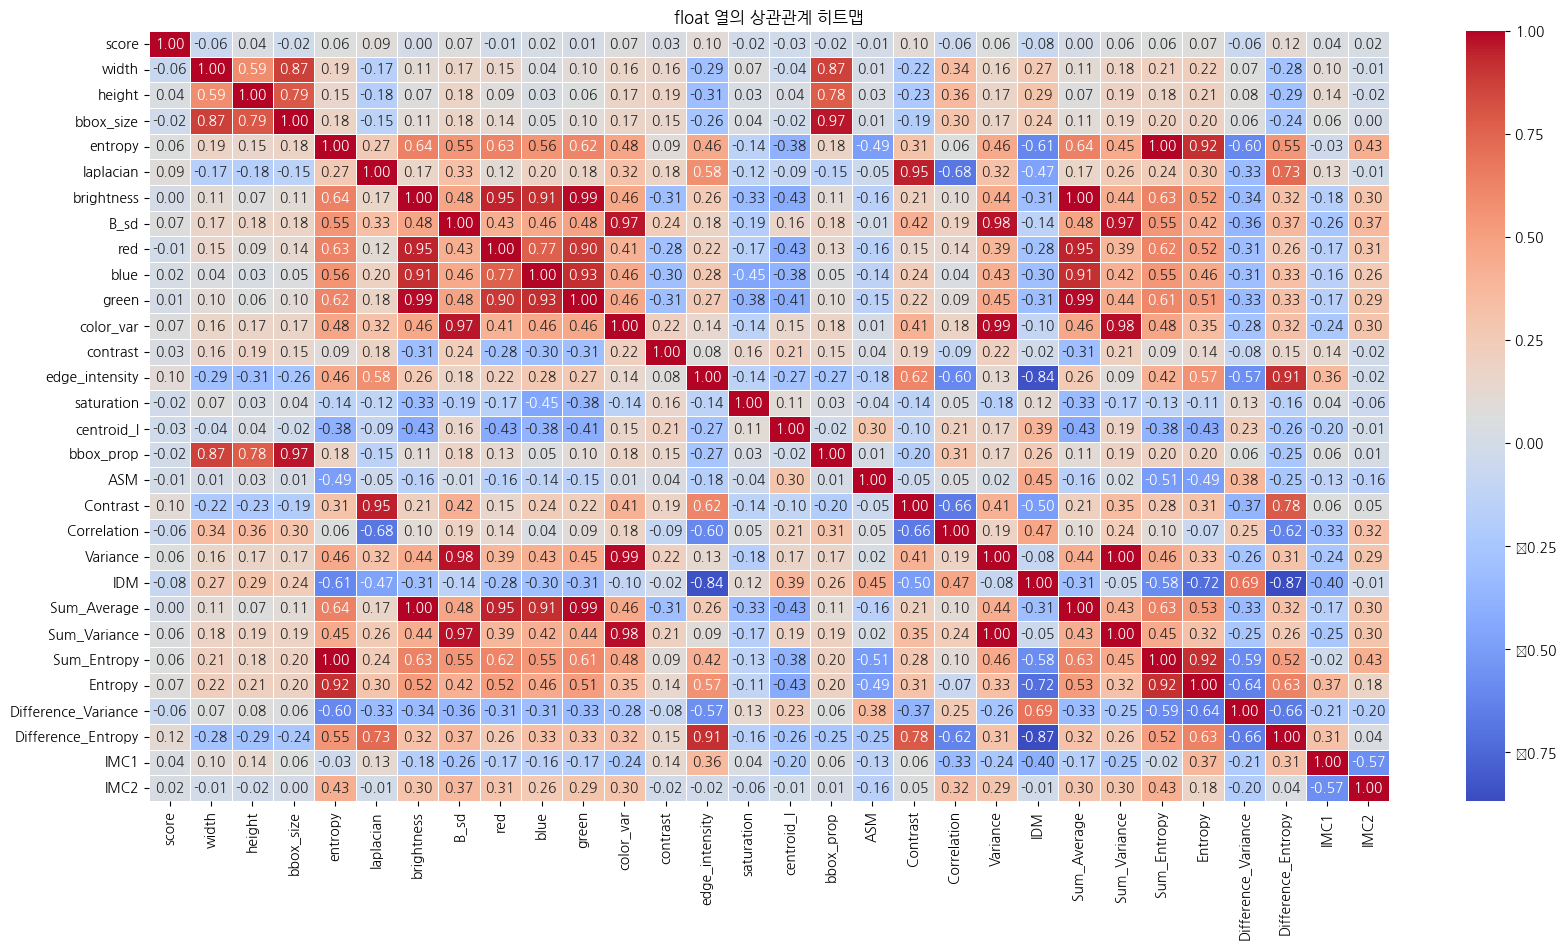

In [14]:
# float 열만 선택
float_columns = low_score.select_dtypes(include=['float64'])

# 상관관계 행렬 계산
correlation_matrix = float_columns.corr()

# 상관관계 행렬을 히트맵으로 시각화
plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('float 열의 상관관계 히트맵')
plt.show()

선정된 feature 13개를 기준으로 조사할 예정
- c_moment_y, c_moment_x, Contrast, sift, Correlation, Difference_Entropy, Laplacian, bbox_prop, blue, green, edge_intensity, saturation, centroid_l


## Contrast를 높이는 processing

In [67]:
len(bbox_df)

149523

In [15]:
# 'image_file' 이름별로 'score'를 평균내기
result_df = bbox_df.groupby('image_file')[['score','Contrast','Correlation','Difference_Entropy','laplacian','blue','green','edge_intensity','saturation','centroid_l']].mean().reset_index()

# 결과 출력
print(result_df)

                                              image_file     score  \
0      /Data/PoseEstimation/COCO/images/train2017/000...  0.874527   
1      /Data/PoseEstimation/COCO/images/train2017/000...  0.705320   
2      /Data/PoseEstimation/COCO/images/train2017/000...  0.810839   
3      /Data/PoseEstimation/COCO/images/train2017/000...  0.791389   
4      /Data/PoseEstimation/COCO/images/train2017/000...  0.659110   
...                                                  ...       ...   
56594  /Data/PoseEstimation/COCO/images/train2017/000...  0.239325   
56595  /Data/PoseEstimation/COCO/images/train2017/000...  0.650479   
56596  /Data/PoseEstimation/COCO/images/train2017/000...  0.736249   
56597  /Data/PoseEstimation/COCO/images/train2017/000...  0.627840   
56598  /Data/PoseEstimation/COCO/images/train2017/000...  0.792162   

          Contrast  Correlation  Difference_Entropy     laplacian        blue  \
0       994.539613     0.862519            5.460092   5116.729328  137.859410 

<Axes: >

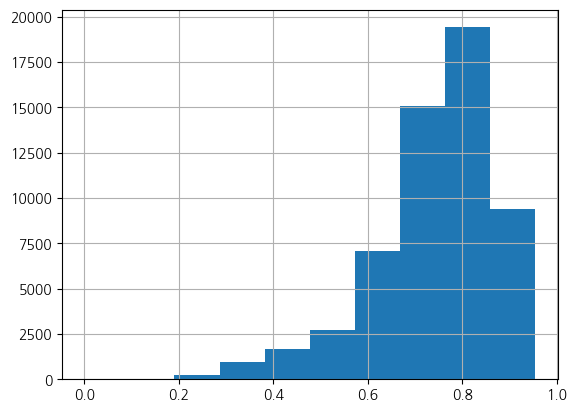

In [16]:
result_df['score'].hist()

In [70]:
# 하위 10%의 threshold
threshold = np.percentile(result_df['score'], 10)
sample_df = result_df[result_df['score']<threshold]

In [71]:
sample_df.score

6        0.528717
25       0.463387
31       0.503166
51       0.541851
57       0.364270
           ...   
56577    0.444897
56578    0.517922
56579    0.427255
56591    0.000000
56594    0.239325
Name: score, Length: 5660, dtype: float64

In [72]:
sample_df.reset_index(drop=True, inplace=True)
sample_df

,image_file,score,Contrast,Correlation,Difference_Entropy,laplacian,blue,green,edge_intensity,saturation,centroid_l
0,/Data/PoseEstimation/COCO/images/train2017/000...,0.528717,190.060633,0.952845,3.981438,690.844126,61.080364,53.997973,31.995192,116.408230,0.129652
1,/Data/PoseEstimation/COCO/images/train2017/000...,0.463387,108.244656,0.984194,4.198873,426.366464,45.809778,82.198461,31.711220,171.642450,0.099384
2,/Data/PoseEstimation/COCO/images/train2017/000...,0.503166,80.832623,0.942028,3.848485,422.277169,76.020998,90.450324,30.226729,120.458306,0.035696
3,/Data/PoseEstimation/COCO/images/train2017/000...,0.541851,579.688479,0.942375,5.532718,3544.258933,81.193380,112.644121,82.247706,133.085237,0.052488
4,/Data/PoseEstimation/COCO/images/train2017/000...,0.364270,312.177060,0.796615,4.320187,1031.970669,37.972961,37.839982,49.055851,103.871454,0.062500
...,...,...,...,...,...,...,...,...,...,...,...
5655,/Data/PoseEstimation/COCO/images/train2017/000...,0.444897,256.055579,0.965432,4.166465,580.777908,42.966266,59.996319,35.132394,133.898846,0.110826
5656,/Data/PoseEstimation/COCO/images/train2017/000...,0.517922,758.336465,0.898686,5.075287,2845.829507,96.630412,108.720758,57.632023,61.641123,0.066826
5657,/Data/PoseEstimation/COCO/images/train2017/000...,0.427255,500.734631,0.940606,4.950504,1332.364416,75.754205,58.863860,57.910688,161.195454,0.122072
5658,/Data/PoseEstimation/COCO/images/train2017/000...,0.000000,35.639019,0.988431,2.934337,119.954529,90.129470,84.614007,13.445539,58.692825,0.051870


In [73]:
len(sample_df.image_file.unique())

5660

In [74]:
sample_df.head()

,image_file,score,Contrast,Correlation,Difference_Entropy,laplacian,blue,green,edge_intensity,saturation,centroid_l
0,/Data/PoseEstimation/COCO/images/train2017/000...,0.528717,190.060633,0.952845,3.981438,690.844126,61.080364,53.997973,31.995192,116.408230,0.129652
1,/Data/PoseEstimation/COCO/images/train2017/000...,0.463387,108.244656,0.984194,4.198873,426.366464,45.809778,82.198461,31.711220,171.642450,0.099384
2,/Data/PoseEstimation/COCO/images/train2017/000...,0.503166,80.832623,0.942028,3.848485,422.277169,76.020998,90.450324,30.226729,120.458306,0.035696
3,/Data/PoseEstimation/COCO/images/train2017/000...,0.541851,579.688479,0.942375,5.532718,3544.258933,81.193380,112.644121,82.247706,133.085237,0.052488
4,/Data/PoseEstimation/COCO/images/train2017/000...,0.364270,312.177060,0.796615,4.320187,1031.970669,37.972961,37.839982,49.055851,103.871454,0.062500


In [216]:
sample_df['score'].mean()

0.45723276580246397

## Sharpeness를 높이는 processing

In [197]:
# sample_df.to_csv("sample_df.csv", index=False)